# Experiments in Extreme Value Theory (EVT)

## Dependencies

In [70]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize
from IPython.display import display, Math

import numpy as np
import pandas as pd

import scipy as sp
#from scipy.optimize import minimize
from scipy.stats import genextreme

print(f"    Pandas {pd.__version__}")
print(f"     NumPy {np.__version__}")
print(f"MatPlotLib {matplotlib.__version__}")
print(f"     SciPy {sp.__version__}")

    Pandas 1.0.3
     NumPy 1.18.1
MatPlotLib 3.1.3
     SciPy 1.4.1


## References

[Cole 2001] Stuart Cole, <i>"An Introduction to Statistical Modeling of Extreme Values"</i>, 2001.

## The Generalized Extreme Value (GEV) Distribution

The GEV family of probability densities is described as follows in [Cole 2001]:

$G(z;\mu,\sigma,\xi) = \exp \left( - \left[ 1 + \xi \left( \frac {z - \mu} {\sigma} \right) \right]^{-1/\xi} \right)$

<p>where
<p>$-\infty < \mu < \infty$,
<p>$\sigma > 0$,
<p>$-\infty < \xi < \infty$,
<p>and $z$ is such that $1 + \xi(z - \mu)/\sigma > 0$

NOTE: The shape parameter, $\xi$, in <b><i>scipy.stats.genextreme</i></b> is the <u><b>negative</b></u> of the shape parameter in R's <i><b>ismev</b></i> library.

SciPy.stats.genextreme, a generalized extreme value continuous random variable, is [documented here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html).

## Example 1

In [71]:
from scipy.stats import norm, genextreme

mean = 100.0
sdev = 10.0

rv = norm(loc=mean, scale=sdev)  # "Frozen" random variable

In [72]:
def source_pdf(x):
    return norm.pdf(x, loc=mean, scale=sdev)

In [73]:
n = 300  # Number of samples
m = 12  # Size of each sample

samples = [rv.rvs(size=m) for _ in range(n)]
#samples[:3] # First 3 samples

In [74]:
maxes = [np.max(sample) for sample in samples]
maxes[:3]  # First 3 maximums of samples

[115.89052867473151, 115.93641324374043, 119.09939326414334]

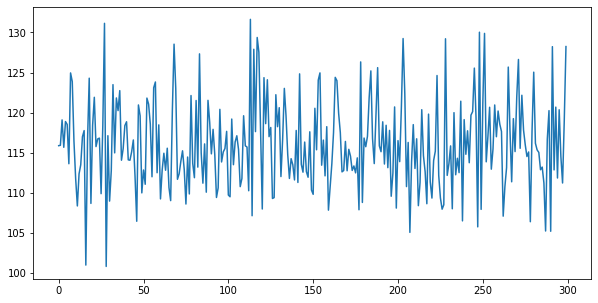

In [75]:
figsize(10,5)
plt.plot(maxes)

In [76]:
mle = genextreme.fit(maxes)

xi, mu, sigma = mle
print(f"   mu = {mu}\nsigma = {sigma}\n   xi = {xi}")

   mu = 113.9305522403107
sigma = 5.174819375125024
   xi = 0.1893584944454099


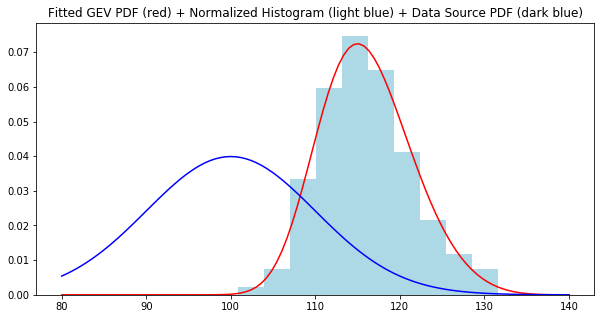

In [77]:
def maxes_pdf(x):
    return genextreme.pdf(x, xi, loc=mu, scale=sigma)

x = np.linspace(80.0, 140.0, num=100)
y = [maxes_pdf(z) for z in x]
u = [source_pdf(z) for z in x]

plt.title("Fitted GEV PDF (red) + Normalized Histogram (light blue) + Data Source PDF (dark blue)")
plt.plot(x,y, color='Red')  # GEV PDF
plt.plot(x,u, color='Blue')  # Data Source PDF
_ = plt.hist(maxes, density=1, color='LightBlue')  # Histogram of Maxes